# Data Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import statsmodels.formula.api as sm

import util_functions as uf

# Get Data

In [67]:
today = datetime.datetime.now()
end_date = datetime.datetime(today.year, today.month, today.day)
start_date = datetime.datetime(today.year-1, 6, 1)

In [68]:
df = uf.getdata('GOOG',[20, 50],'Close',start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [69]:
df

,Date,Open,High,Low,Close,Volume,ticker,sma_20,ema_20,wma_20,sma_50,ema_50,wma_50,upper_band,middle_band,Lower_band,bb_width,bb_percent,obv,vwap,adl,adx,macd,ichimoku_a,ichimoku_b,rsi,stoch,cci,roc,atr,kc,uo,wr,doji,hammer,engulfing,harami
0,2023-06-01,123.500000,125.040001,123.300003,124.370003,25017700,GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25017700,NaN,5.751224e+06,0.000000,NaN,NaN,124.170002,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,0,0,0,0
1,2023-06-02,124.489998,126.745003,124.349998,125.230003,19362400,GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44380100,NaN,6.176145e+05,0.000000,NaN,NaN,125.022503,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,0,0,0,0
2,2023-06-05,124.610001,127.989998,124.379997,126.629997,22672500,GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67052600,NaN,6.207229e+06,0.000000,NaN,NaN,125.645000,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,0,0,0,0
3,2023-06-06,126.599998,128.880005,125.970001,127.910004,19450100,GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86502700,NaN,1.269060e+07,0.000000,NaN,NaN,126.090004,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,0,0,0,0
4,2023-06-07,127.574997,129.550003,122.629997,122.940002,34179300,GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52323400,NaN,-1.842635e+07,0.000000,NaN,NaN,126.090000,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2024-03-12,138.250000,140.279999,138.210007,139.619995,19019700,GOOG,140.031499,139.503129,138.180999,143.298799,141.064911,142.274940,148.555745,140.031499,131.507253,12.174755,0.475863,358945200,137.906250,6.601354e+07,24.120860,-2.145770,138.518753,143.375000,48.514442,55.085293,-12.949385,-3.902539,3.114487,0.0,49.240568,-44.914707,0,0,0,0
196,2024-03-13,140.059998,142.190002,140.009995,140.770004,19637000,GOOG,139.751499,139.623784,138.251333,143.295599,141.053346,142.175772,147.777890,139.751499,131.725109,11.486661,0.563447,378582200,137.619036,6.006852e+07,22.603808,-1.774143,138.996254,143.375000,50.831142,64.005568,25.025437,1.455859,3.075596,0.0,52.228544,-35.994432,0,0,0,0
197,2024-03-14,142.300003,144.729996,141.485001,144.339996,36117900,GOOG,139.611499,140.072947,138.688332,143.391199,141.182234,142.216729,147.203430,139.611499,132.019568,10.875796,0.811416,414700100,137.875373,8.750476e+07,21.567389,-1.177979,139.631252,143.375000,57.260460,97.040974,85.346660,3.026403,3.138767,1.0,54.692716,-2.959026,0,0,0,0
198,2024-03-15,143.410004,144.339996,141.130005,142.169998,41025900,GOOG,139.522999,140.272666,138.931999,143.427399,141.220970,142.168838,146.950521,139.522999,132.095477,10.647022,0.678189,373674200,138.138602,7.306252e+07,20.482978,-0.870580,139.631252,143.375000,52.745662,80.576639,66.245381,3.449033,3.143855,0.0,56.767190,-19.423361,0,0,0,0


# Remove NA

In [70]:
df = df.dropna(subset=df.columns.tolist())

In [71]:
df['next_day_close'] = df['Close'].shift(-1)

In [72]:
df = df.dropna(subset=['next_day_close'])

In [73]:
df = df.drop(columns='ticker')

# Remove Outliers

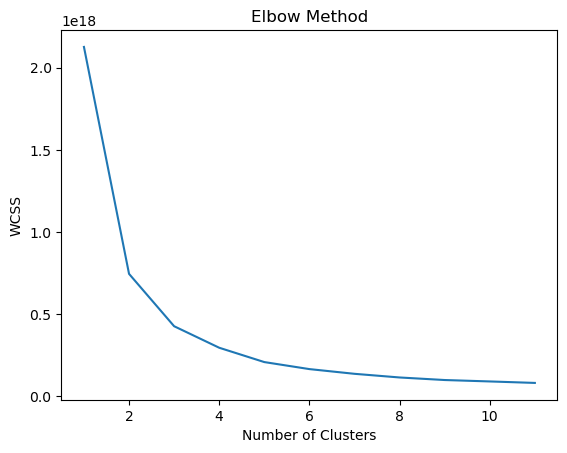

In [74]:
plot_k_clusters = uf.kmeans_elbow_method(df.drop(columns=['Date']))

In [75]:
df_outliers = uf.detect_outliers_kmeans(df.drop(columns='Date'), 4)

In [76]:
len(df_outliers)

23

In [77]:
# Check for location of outliers
df[df.index.isin(df_outliers.index.tolist())]

,Date,Open,High,Low,Close,Volume,sma_20,ema_20,wma_20,sma_50,ema_50,wma_50,upper_band,middle_band,Lower_band,bb_width,bb_percent,obv,vwap,adl,adx,macd,ichimoku_a,ichimoku_b,rsi,stoch,cci,roc,atr,kc,uo,wr,doji,hammer,engulfing,harami,next_day_close
61,2023-08-29,132.998001,137.294998,132.979996,135.490005,30803300,130.513000,130.312008,130.942477,126.107600,127.809733,128.436259,134.006278,130.513000,127.019723,5.353148,1.212369,158318300,130.998663,-1.200323e+08,17.045463,1.588424,130.779999,126.562500,63.886497,82.467285,257.922560,4.086969,3.228327,1.0,53.047464,-17.532715,0,0,0,0,136.929993
63,2023-08-31,137.050003,138.399994,136.820007,137.350006,28147900,131.356500,131.552551,132.165286,126.691000,128.527493,129.291286,136.419333,131.356500,126.293668,7.708537,1.091912,208239600,132.074053,-1.137745e+08,19.602760,2.198482,132.739998,127.114998,66.825636,90.789576,236.942362,5.434867,3.044307,1.0,54.031301,-9.210424,100,0,0,0,136.800003
64,2023-09-01,138.429993,138.580002,135.940002,136.800003,16665700,131.769501,132.052308,132.683715,126.949600,128.851905,129.687718,137.181505,131.769501,126.357496,8.214351,0.964754,191573900,132.413358,-1.195822e+08,20.452283,2.344609,133.049999,127.205002,65.041278,84.628683,175.022018,5.956163,3.015428,1.0,48.600860,-15.371317,0,0,-100,0,136.710007
65,2023-09-05,136.440002,137.369995,135.559998,136.710007,17730200,132.008001,132.495898,133.154240,127.223400,129.160066,130.070479,137.833649,132.008001,126.182353,8.826204,0.903561,173843700,132.742393,-1.147821e+08,21.059313,2.425198,133.049999,127.205002,64.736676,83.851513,129.597554,4.790740,2.929326,1.0,55.792308,-16.148487,100,0,0,0,135.369995
66,2023-09-06,137.014999,137.479996,134.690002,135.369995,15814300,132.184501,132.769622,133.474429,127.549000,129.403593,130.389953,138.190208,132.184501,126.178794,9.086855,0.765206,158029400,133.098442,-1.228877e+08,21.203417,2.353804,133.049999,127.205002,60.214822,72.279739,93.928519,5.667001,2.919373,1.0,50.970235,-27.720261,0,0,-100,0,136.199997
69,2023-09-11,137.380005,138.264008,136.550003,137.740005,17180800,133.215001,133.892184,134.772715,128.569800,130.270294,131.467718,139.835438,133.215001,126.594563,9.939477,0.841745,209996900,134.702860,-9.317072e+07,21.426120,2.424884,134.285000,127.205002,65.168074,92.030402,96.468586,3.400645,2.730313,1.0,53.650423,-7.969598,0,0,0,0,136.070007
70,2023-09-12,137.130005,137.639999,135.929993,136.070007,15212900,133.427001,134.099596,135.044620,128.871800,130.497734,131.761844,140.127522,133.427001,126.726480,10.043726,0.697224,194784000,135.071698,-1.058924e+08,21.405743,2.301213,134.530003,127.205002,59.108800,76.186030,67.282786,4.332165,2.664577,1.0,51.415008,-23.813970,0,0,0,0,137.500000
71,2023-09-13,135.899994,137.699997,134.929993,137.500000,16394900,133.788501,134.423444,135.432525,129.210600,130.772332,132.100204,140.548589,133.788501,127.028413,10.105634,0.774516,211178900,135.413332,-9.186492e+07,20.868624,2.292169,134.530003,127.205002,62.337977,89.753312,64.422910,5.210802,2.672108,1.0,57.771219,-10.246688,0,0,100,0,138.990005
72,2023-09-14,138.389999,139.550003,137.059998,138.990005,19064600,134.282501,134.858355,135.927906,129.537800,131.094594,132.483711,141.046827,134.282501,127.518175,10.074769,0.847966,230243500,135.875284,-8.137551e+07,21.025538,2.377822,135.015003,127.690002,65.403683,95.134691,96.596644,5.463247,2.659100,1.0,61.910686,-4.865309,0,0,0,0,138.300003
128,2023-12-04,131.294006,131.449997,129.399994,130.630005,24117100,135.483499,135.097906,135.958524,134.640800,134.381509,134.654886,141.062012,135.483499,129.904986,8.234970,0.064983,108140000,136.269253,-4.310617e+06,16.012130,0.198352,133.265001,131.920002,39.564866,10.512903,-128.783631,-4.216161,2.788026,0.0,39.492723,-89.487097,0,100,0,0,132.389999


In [78]:
df = df[~df.index.isin(df_outliers.index.tolist())]

# Scale df

In [79]:
df_x = df.drop(columns=['Date','next_day_close'])
df_y = df[['next_day_close']]

In [80]:
scaler_x = MinMaxScaler()

scaler_x.fit(df_x)
scaled_data_x = scaler_x.transform(df_x)
df_scaled_x = pd.DataFrame(scaled_data_x, columns=df_x.columns)

In [81]:
scaler_y = MinMaxScaler()

scaler_y.fit(df_y)
scaled_data_y = scaler_y.transform(df_y)
df_scaled_y = pd.DataFrame(scaled_data_y, columns=df_y.columns)

# PCA - reduce dimensionality

In [82]:
df_scaled_x.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'sma_20', 'ema_20', 'wma_20',
       'sma_50', 'ema_50', 'wma_50', 'upper_band', 'middle_band', 'Lower_band',
       'bb_width', 'bb_percent', 'obv', 'vwap', 'adl', 'adx', 'macd',
       'ichimoku_a', 'ichimoku_b', 'rsi', 'stoch', 'cci', 'roc', 'atr', 'kc',
       'uo', 'wr', 'doji', 'hammer', 'engulfing', 'harami'],
      dtype='object')

In [83]:
# Apply PCA

pca = PCA(n_components=10)  # Specify the number of components you want to retain
principal_components = pca.fit_transform(df_scaled_x)

# Create a new DataFrame with the principal components
df_pca_full_x = pd.DataFrame(data=principal_components)


In [84]:
for i in df_pca_full_x.columns.to_list():
    var_rename = "PCA"+str(i)
    df_pca_full_x = df_pca_full_x.rename(columns={i:var_rename})

In [85]:
df_reset_index = df.reset_index(drop=True).reset_index()

In [86]:
df_scaled_x = df_pca_full_x.reset_index()

In [87]:
df_scaled_full_x = pd.merge(left=df_reset_index[['index','Date']],right=df_scaled_x, on='index')

In [88]:
df_scaled_full_x = df_scaled_full_x.drop(columns='index')

# Company Fundamentals

In [89]:
import requests
import json

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=IBM&apikey=M482KPOEHSDW3G1M'
r = requests.get(url)
data = r.json()

df_normalse = pd.json_normalize(data)

In [90]:
df_quarterly= pd.json_normalize(df_normalse['quarterlyReports'])

In [91]:
df_normalise_2023_q4 = pd.json_normalize(df_quarterly[0])
df_normalise_2023_q3 = pd.json_normalize(df_quarterly[1])
df_normalise_2023_q2 = pd.json_normalize(df_quarterly[2])
df_normalise_2023_q1 = pd.json_normalize(df_quarterly[3])
df_normalise_2022_q4 = pd.json_normalize(df_quarterly[4])
df_normalise_2022_q3 = pd.json_normalize(df_quarterly[5])
df_normalise_2022_q2 = pd.json_normalize(df_quarterly[6])
df_normalise_2022_q1 = pd.json_normalize(df_quarterly[7])


In [92]:
df_comp_fund = pd.concat([df_normalise_2023_q4,df_normalise_2023_q3,df_normalise_2023_q2,df_normalise_2023_q1,
           df_normalise_2022_q4,df_normalise_2022_q3,df_normalise_2022_q2,df_normalise_2022_q1])
           

In [93]:
df_comp_fund = df_comp_fund.drop(columns='reportedCurrency')

In [94]:
scaler = MinMaxScaler()
scaler.fit(df_comp_fund.drop(columns=['fiscalDateEnding','investmentIncomeNet']))
scaled_data = scaler.transform(df_comp_fund.drop(columns=['fiscalDateEnding','investmentIncomeNet']))
df_comp_fund_scaled = pd.DataFrame(scaled_data, columns=df_comp_fund.drop(columns=['fiscalDateEnding','investmentIncomeNet']).columns)

In [95]:
scaled_data.shape

(8, 23)

In [96]:
df_comp_fund_reset_index = df_comp_fund.reset_index(drop=True).reset_index()

In [97]:
df_comp_fund_scaled = df_comp_fund_scaled.reset_index()

In [98]:
df_comp_fund= df_comp_fund_reset_index[['index','fiscalDateEnding']].merge(df_comp_fund_scaled, on='index')

In [99]:
df_comp_fund = df_comp_fund.drop(columns = 'index')

In [100]:
df_comp_fund['fiscalDateEnding'] = pd.to_datetime(df_comp_fund['fiscalDateEnding'])

# df

In [101]:
df = pd.concat([df_scaled_full_x, df_scaled_y], axis=1)

In [102]:
df

,Date,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,next_day_close
0,2023-08-11,-1.794570,0.309410,0.091156,0.073030,0.335021,0.307155,0.109344,0.047992,0.278770
1,2023-08-14,-1.789502,-0.323696,-0.108414,-0.211703,-0.296057,0.160842,-0.058082,0.114868,0.227183
2,2023-08-15,-1.671907,0.468732,0.210185,0.047301,0.332620,0.325747,-0.088984,0.016257,0.188823
3,2023-08-16,-1.632264,0.687469,0.672421,0.685100,-0.345220,0.211958,-0.112868,0.159735,0.233466
4,2023-08-17,-1.594370,0.477350,0.710206,0.677358,-0.254121,0.155929,0.136057,0.077639,0.155754
...,...,...,...,...,...,...,...,...,...,...
122,2024-03-11,0.878826,0.496527,-0.562676,0.251359,0.181780,-0.212358,0.069542,-0.006467,0.536375
123,2024-03-12,0.866147,0.356530,-0.486646,0.264943,0.288389,-0.261300,0.036047,-0.000115,0.574405
124,2024-03-13,0.861668,0.121554,-0.419168,0.281360,0.429788,-0.275979,0.075130,0.020242,0.692460
125,2024-03-14,0.850710,-0.854725,-0.676235,0.056284,-0.070274,-0.456277,0.298045,-0.016751,0.620701


In [103]:
#df = df.drop(columns=['Date','quarter'])
df = df.drop(columns=['Date'])

# Feature engineering

In [104]:
# Calculate the correlation coefficients between market indicators and stock prices
correlation_matrix = df.corr()
correlation_with_stock_prices = correlation_matrix['next_day_close'].dropna()
relevant_indicators = correlation_with_stock_prices[abs(correlation_with_stock_prices) > 0.5].index.tolist()

# Identify relevant indicators

In [105]:
relevant_indicators

['PCA0', 'PCA1', 'next_day_close']

In [106]:
relevant_indicators = df.columns

In [107]:
relevant_indicators

Index(['PCA0', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7',
       'next_day_close'],
      dtype='object')

# Train Model

In [108]:
# Check for NaN values
nan_locations = df.isna().any()

# Get the columns with NaN values
columns_with_nan = nan_locations[nan_locations].index.tolist()

# Get the rows with NaN values
rows_with_nan = df[df.isna().any(axis=1)].index.tolist()


In [109]:
df = df.fillna(0)

# Check for overfitting

In [110]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set the window size and step size for cross-validation
window_size = 50
step_size = 10

# Initialize lists to store the performance metrics
mse_scores_test = []
mse_scores_train = []


for i in relevant_indicators[:-1]:

    mse_scores_test = []
    mse_scores_train = []
    
    df_temp = df[relevant_indicators].drop(columns=i)    
    # Perform rolling window cross-validation
    for start in range(0, len(df) - window_size + 1, step_size):
        
        end = start + window_size
        
        # Split the data into training and validation sets
        train_data = df_temp.iloc[start:end]
        test_data = df_temp.iloc[end:end+step_size]

        train_data_endog = train_data['next_day_close']
        train_data_exog = train_data.drop(columns='next_day_close')

        test_data_endog = test_data['next_day_close']
        test_data_exog = test_data.drop(columns='next_day_close')
        
        # Fit the ARIMAX model
        model = ARIMA(endog=train_data_endog, exog=train_data_exog, order=(0, 0, 0))
        model_fit = model.fit()

        # Make predictions
        test_predictions = model_fit.get_forecast(steps=len(test_data), exog=test_data_exog)
        train_predictions = model_fit.get_forecast(steps=len(train_data), exog=train_data_exog)

        val_predictions_mean = test_predictions.predicted_mean
        val_predictions_mean = val_predictions_mean.values.reshape(-1,1)
        test_pred = scaler_y.inverse_transform(val_predictions_mean)

        test_endo = test_data_endog.values.reshape(-1,1)
        test_endo = scaler_y.inverse_transform(test_endo)

        train_predictions_mean = train_predictions.predicted_mean
        train_pred = train_predictions_mean.values.reshape(-1,1)
        train_pred = scaler_y.inverse_transform(train_pred)

        train_endo = train_data_endog.values.reshape(-1,1)
        train_endo = scaler_y.inverse_transform(train_endo)

        #Calculate mean squared error (MSE) as the performance metric
        mse_test = mean_squared_error(test_endo, test_pred)
        mse_scores_test.append(round(mse_test,4))

        mse_train = mean_squared_error(train_endo, train_pred)
        mse_scores_train.append(round(mse_train,4))

    print("Remove {} = {}\n{}".format(i,mse_scores_test,mse_scores_train))

Remove PCA0 = [21.3694, 7.3326, 16.4755, 11.6389, 55.2803, 23.326, 39.0551, 20.1162]
[6.3979, 4.7097, 4.472, 5.502, 6.9447, 4.0986, 6.1368, 7.2008]
Remove PCA1 = [13.2362, 18.889, 6.3885, 33.6766, 12.0099, 446.4132, 29.8042, 20.597]
[18.778, 18.5147, 14.0808, 13.2822, 7.373, 4.7835, 10.5479, 10.0346]
Remove PCA2 = [5.3169, 6.5453, 10.1801, 6.5426, 17.6566, 13.3197, 10.4968, 4.8519]
[5.3945, 5.1448, 5.1362, 5.4033, 5.8379, 2.7104, 3.6165, 4.1876]
Remove PCA3 = [4.4264, 5.1261, 34.8319, 6.9812, 14.6732, 11.2511, 6.5066, 16.062]
[5.8194, 5.1594, 3.8086, 5.4184, 5.7667, 2.8915, 3.4183, 3.6324]
Remove PCA4 = [4.1447, 7.8704, 31.2813, 7.6929, 6.2215, 31.2445, 6.3001, 43.0043]
[5.8469, 4.6958, 3.8792, 5.5069, 6.0555, 2.9227, 3.5154, 3.5867]
Remove PCA5 = [3.5643, 6.9241, 9.1418, 8.4233, 4.5186, 9.6662, 12.126, 36.5919]
[5.7969, 4.7054, 4.7692, 5.4793, 6.0033, 2.7707, 3.5862, 4.0238]
Remove PCA6 = [1.7452, 4.627, 34.9604, 10.8031, 3.943, 63.076, 7.5996, 29.4299]
[6.103, 5.0459, 3.8167, 5.6105,

In [111]:
#df = df[relevant_indicators].drop(columns='Close')

# Find Best Order

In [112]:
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df[:train_size]
test_data = df[train_size:]

In [113]:
train_data_endog = train_data['next_day_close']
train_data_exog = train_data.drop(columns='next_day_close')

In [114]:
test_data_endog = test_data['next_day_close']
test_data_exog = test_data.drop(columns='next_day_close')

# ARIMA Model Prediction

In [115]:
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

best_accuracy=0
for p in range(3):
        for d in range(2):
                for q in range(3):
                
                        model = ARIMA(endog=train_data_endog, exog=train_data_exog, order=(p, d, q))
                        model_fit = model.fit()

                        # Forecast on the test data
                        forecast = model_fit.get_forecast(steps=len(test_data), exog=test_data_exog)

                        # Get the predicted values
                        predicted_values = forecast.predicted_mean
                        val_predictions_mean = predicted_values.values.reshape(-1,1)
                        test_pred = scaler_y.inverse_transform(val_predictions_mean)
                        test_pred_series = pd.Series(test_pred.flatten())

                        # Calculate the price change from the predicted values
                        predicted_price_change = test_pred_series.diff()

                        # Create a binary target variable indicating if the price change is positive (1) or not (0)
                        predicted_price_up = (predicted_price_change > 0).astype(int)

                        # Calculate the actual price change from the test data
                        actual_price_change = df_y[train_size:].diff()

                        # Create a binary target variable for the actual price change
                        actual_price_up = (actual_price_change > 0).astype(int)

                        # Calculate the accuracy of the predictions
                        accuracy = accuracy_score(actual_price_up, predicted_price_up)

                        if best_accuracy<accuracy:
                                best_accuracy = accuracy

                                best_p, best_d, best_q = p,d,q
#Print the accuracy
print(f"Accuracy of best order ({best_p},{best_d},{best_q}) = {best_accuracy}")

Accuracy of best order (2,1,2) = 0.6153846153846154


# SARIMA Model

In [233]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Specify the order and seasonal order of the SARIMA model
order = (2, 0, 0)  # (p, d, q)
seasonal_order = (1, 0, 0, 90)  # (P, D, Q, seasonal_periods)

# Create the SARIMA model
model = SARIMAX(endog=train_data_endog, exog=train_data_exog, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
results = model.fit()

# Forecast on the test data
forecast = results.get_forecast(steps=len(test_data), exog=test_data_exog)

# Get the predicted mean values
predicted_values = forecast.predicted_mean
val_predictions_mean = predicted_values.values.reshape(-1,1)
test_pred = scaler_y.inverse_transform(val_predictions_mean)
test_pred_series = pd.Series(test_pred.flatten())

# Calculate the price change from the predicted values
predicted_price_change = test_pred_series.diff()

# Create a binary target variable indicating if the price change is positive (1) or not (0)
predicted_price_up = (predicted_price_change > 0).astype(int)

# Calculate the actual price change from the test data
actual_price_change = test_data['next_day_close'].diff()

# Create a binary target variable for the actual price change
actual_price_up = (actual_price_change > 0).astype(int)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(actual_price_up, predicted_price_up)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.627906976744186
